In [ ]:
# @title Connect to google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Install latest version of Tensorflow
!pip install tensorflow --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
# @title Libraries
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
import os
from tensorflow.keras.regularizers import l2



2.17.1


In [ ]:
# @title Load Dataset to colab local Environment
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Copy Dataset from Google Drive to Local Environment
drive_train_dir = '/content/drive/MyDrive/DeepNotebook/NewVirusDataset/train'
drive_val_dir = '/content/drive/MyDrive/DeepNotebook/NewVirusDataset/validation'
drive_test_dir = '/content/drive/MyDrive/DeepNotebook/NewVirusDataset/test'

# Local paths in Colab
local_train_dir = '/content/augmented_train'
local_val_dir = '/content/validation'
local_test_dir = '/content/test'

# Copy datasets to local environment
shutil.copytree(drive_train_dir, local_train_dir, dirs_exist_ok=True)
shutil.copytree(drive_val_dir, local_val_dir, dirs_exist_ok=True)
shutil.copytree(drive_test_dir, local_test_dir, dirs_exist_ok=True)
print("Datasets copied to Colab environment.")


Datasets copied to Colab environment.


In [ ]:
# @title Create DataFrame of Image Paths and Labels in  train
#  extracts image file paths and their corresponding labels , and organizes them into a Pandas DataFrame (`df_train`) with two columns to use in visualization
# Directory containing the "Train" folder
import pandas as pd
directory = local_train_dir

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [ ]:
df_train

,filepath,label
0,/content/augmented_train/Ebola/13_29.tif,Ebola
1,/content/augmented_train/Ebola/18_19.tif,Ebola
2,/content/augmented_train/Ebola/23_25.tif,Ebola
3,/content/augmented_train/Ebola/58_16.tif,Ebola
4,/content/augmented_train/Ebola/11_20.tif,Ebola
...,...,...
10299,/content/augmented_train/Orf/36_3_1.tif,Orf
10300,/content/augmented_train/Orf/4_6_2.tif,Orf
10301,/content/augmented_train/Orf/25_2_8.tif,Orf
10302,/content/augmented_train/Orf/33_2_1.tif,Orf


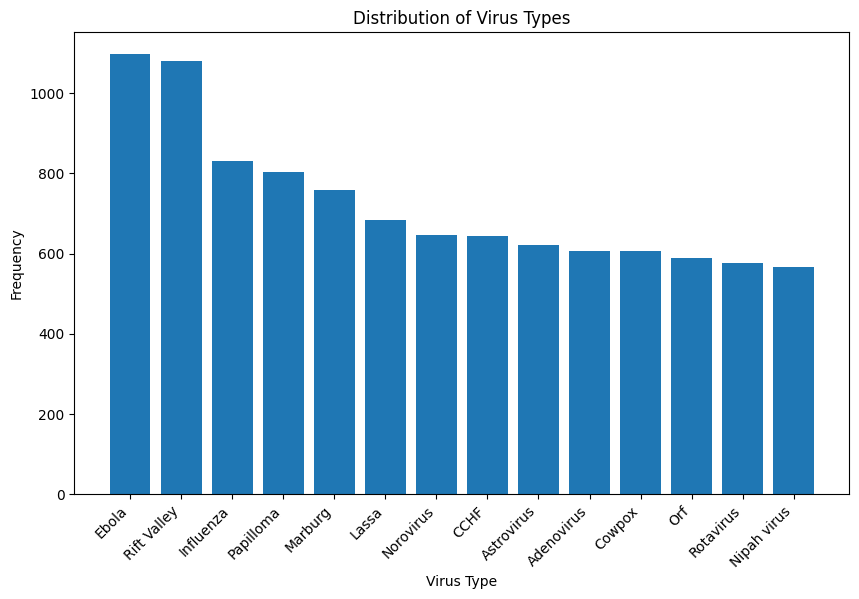

In [ ]:
# @title Distribution of Virus Types In train split

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df_train'
virus_counts = df_train['label'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(virus_counts.index, virus_counts.values)
plt.xlabel('Virus Type')
plt.ylabel('Frequency')
plt.title('Distribution of Virus Types')
_ = plt.xticks(rotation=45, ha='right')

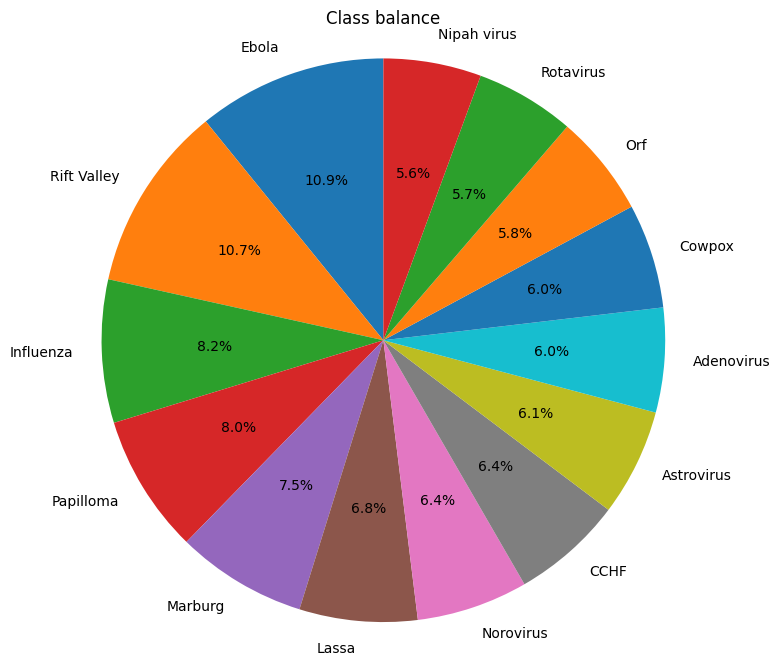

In [ ]:
# @title Class balance (train split)

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df_train'
label_counts = df_train['label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class balance')
_ = plt.axis('equal')

In [ ]:
# @title Create DataFrame of Image Paths and Labels in test
# Directory containing the "Test" folder
directory = local_test_dir

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)
 #Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_test = pd.concat([file_path_series ,Label_path_series ] , axis = 1)


In [ ]:
df_test

,filepath,label
0,/content/test/Ebola/17_10_test.tif,Ebola
1,/content/test/Ebola/14_10_val.tif,Ebola
2,/content/test/Ebola/5_25_test.tif,Ebola
3,/content/test/Ebola/17_3_test.tif,Ebola
4,/content/test/Ebola/19_22_val.tif,Ebola
...,...,...
1448,/content/test/Marburg/26_7_1.tif,Marburg
1449,/content/test/Marburg/28_3_1.tif,Marburg
1450,/content/test/Marburg/13_3_2.tif,Marburg
1451,/content/test/Marburg/56_20_1.tif,Marburg


In [ ]:
# @title Load and Preprocess DataSet

# Define data generators with only rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values to [0, 1] for Normalization
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_directory(
   local_train_dir,
    target_size=(299, 299),  # Resize images to match Xception input
    batch_size=16,
    class_mode='categorical'  # Multi-class classification
)

val_generator = val_datagen.flow_from_directory(
   local_val_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
   local_test_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)


Found 10109 images belonging to 14 classes.
Found 2891 images belonging to 14 classes.
Found 1453 images belonging to 14 classes.


In [ ]:
# @title Load Pretrained Xception Model
# Load the Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
base_model.trainable = False

# unfreeze last 20 layer in model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Add custom layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.summary()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,125,558 (80.59 MB)

 Trainable params: 7,590,454 (28.96 MB)

 Non-trainable params: 13,535,104 (51.63 MB)

In [ ]:
# @title preparing Xception model for training.
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(f"model compile successfly")


model compile successfly


In [ ]:
# @title Training Step

history = model.fit(
    train_generator,
    epochs=10,  # Adjust based on your dataset size and resources
    validation_data=val_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


632/632 ━━━━━━━━━━━━━━━━━━━━ 154s 204ms/step - accuracy: 0.6876 - loss: 2.1133 - val_accuracy: 0.9166 - val_loss: 0.5086
Epoch 2/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 108s 170ms/step - accuracy: 0.9119 - loss: 0.5408 - val_accuracy: 0.8948 - val_loss: 0.6139
Epoch 3/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 142s 170ms/step - accuracy: 0.9432 - loss: 0.4203 - val_accuracy: 0.9554 - val_loss: 0.3511
Epoch 4/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 142s 170ms/step - accuracy: 0.9566 - loss: 0.3444 - val_accuracy: 0.9723 - val_loss: 0.2849
Epoch 5/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 142s 169ms/step - accuracy: 0.9785 - loss: 0.2559 - val_accuracy: 0.9709 - val_loss: 0.2382
Epoch 6/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 142s 169ms/step - accuracy: 0.9788 - loss: 0.2449 - val_accuracy: 0.9713 - val_loss: 0.2761
Epoch 7/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 142s 170ms/step - accuracy: 0.9796 - loss: 0.2457 - val_accuracy: 0.9492 - val_loss: 0.3949
Epoch 8/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 146s 176ms/step - accuracy: 0.9811 - loss: 0.25

In [ ]:
# @title Save Model
# Save model
model.save('virus_classification_xception.keras')

In [ ]:
# @title Load Model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/virus_classification_xception.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 29 variables whereas the saved optimizer has 56 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# @title Move model to google drive
# move model to google drive
!cp virus_classification_xception.keras /content/drive/MyDrive/




In [ ]:
# @title Validartion Accuracy
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


181/181 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.9669 - loss: 0.2683
Validation Accuracy: 96.54%


In [ ]:
# @title Test Accuracy
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.9552 - loss: 0.3134
Test Accuracy: 95.60%


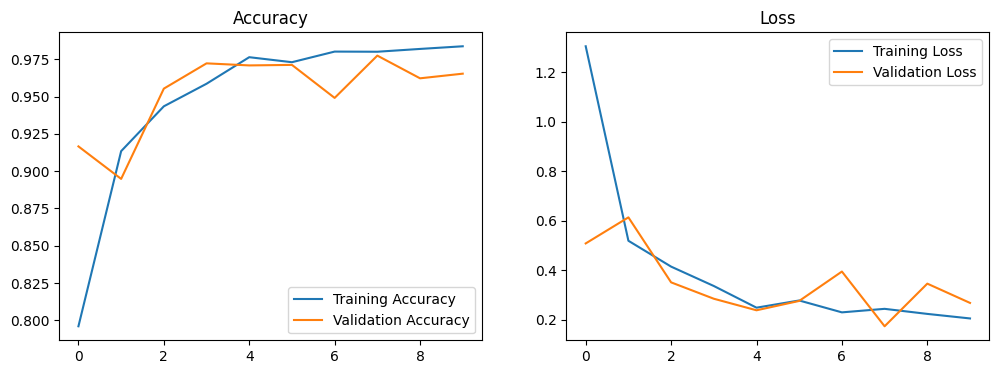

In [ ]:
# @title visualize training result
#visualize training result
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [ ]:
# @title Predict on Test Data
import numpy as np
# Predict labels for the test data
y_pred_probs = model.predict(test_generator)  # Probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)    # Predicted class labels # If you used softmax in your output layer, get the class with the highest probability
y_true = test_generator.classes              # True labels

# Class labels
class_labels = list(test_generator.class_indices.keys())


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 31s 201ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


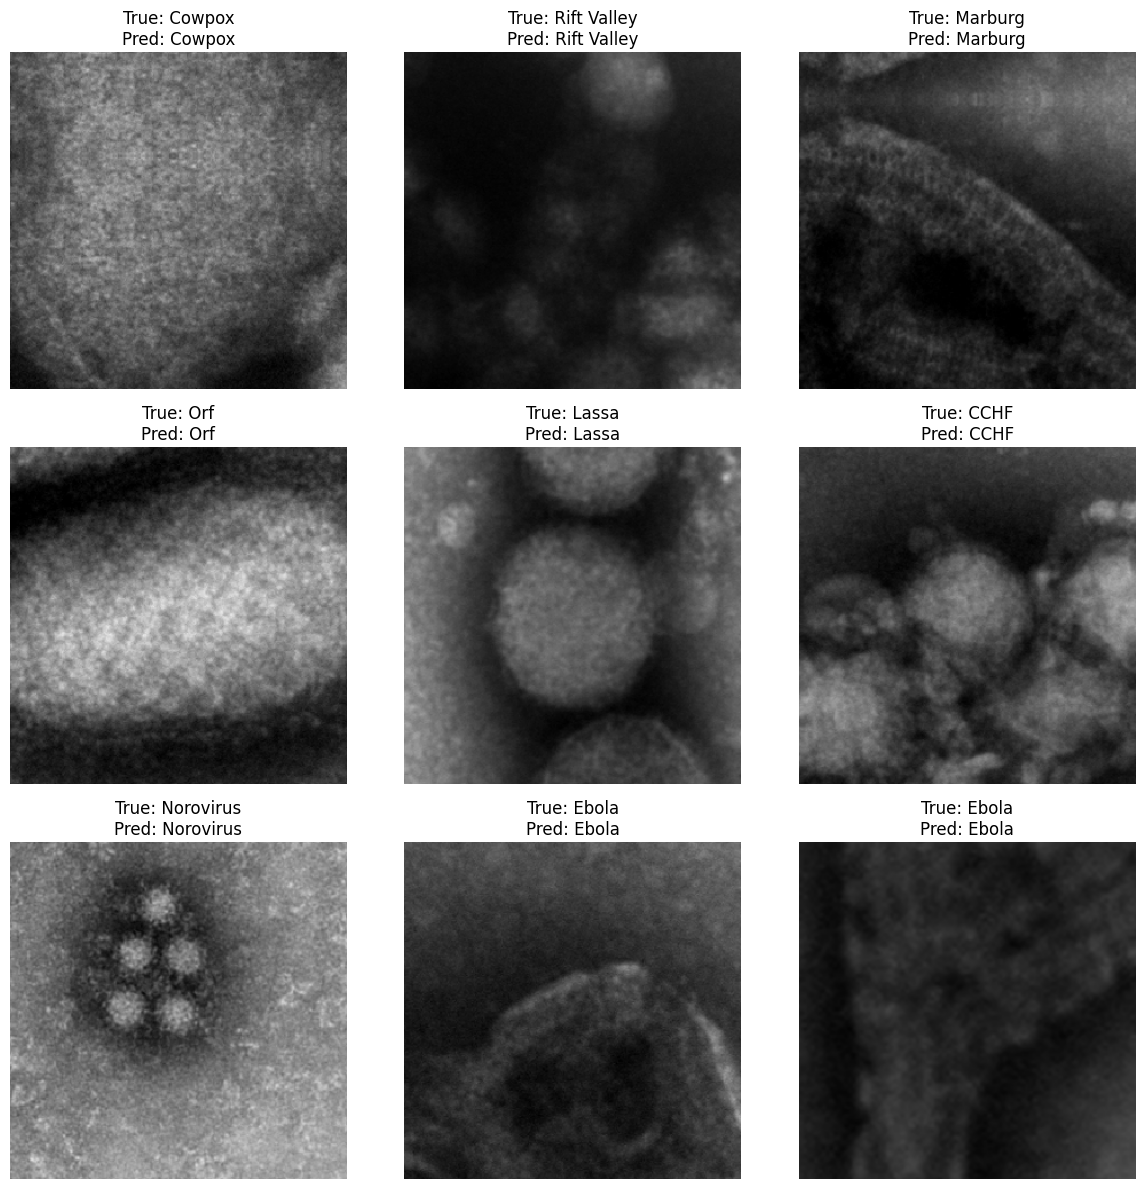

In [ ]:
# @title Visualize Some of Virus Classification
import numpy as np
import matplotlib.pyplot as plt

#  test_generator is your test data generator
test_images, test_labels = next(test_generator)  # Get a batch of test data

# Get the total number of test samples
num_test_samples = len(test_generator.filenames)

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# If test_labels is one-hot encoded, convert to class indices
if test_labels.ndim == 2:  # Check if it's one-hot encoded (2D array)
    test_labels = np.argmax(test_labels, axis=1)  # Convert to class indices

# Make predictions on test data
predictions = model.predict(test_images)  # Predictions on test images
pred_classes = np.argmax(predictions, axis=1)  # Get predicted class indices

# Visualize the results
plt.figure(figsize=(12, 12))
for i in range(min(9, num_test_samples)):  # Display up to 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])

    # Get true and predicted labels
    true_label = class_labels[test_labels[i]]  # True label
    predicted_label = class_labels[pred_classes[i]]  # Predicted label

    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# @title  Precision , Recall and F1_Score Report
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_labels, digits=4)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

  Adenovirus     0.9551    0.9770    0.9659        87
  Astrovirus     1.0000    0.9888    0.9944        89
        CCHF     1.0000    0.9355    0.9667        93
      Cowpox     0.9651    0.9540    0.9595        87
       Ebola     0.9456    0.8854    0.9145       157
   Influenza     0.9915    0.9832    0.9873       119
       Lassa     0.8738    0.9184    0.8955        98
     Marburg     0.9189    0.9358    0.9273       109
 Nipah virus     0.7788    0.9878    0.8710        82
   Norovirus     1.0000    0.9785    0.9891        93
         Orf     0.9882    0.9882    0.9882        85
   Papilloma     1.0000    1.0000    1.0000       116
 Rift Valley     0.9932    0.9484    0.9703       155
   Rotavirus     0.9875    0.9518    0.9693        83

    accuracy                         0.9560      1453
   macro avg     0.9570    0.9595    0.9571      1453
weighted avg     0.9594    0.9560    0.9567      1453



  1/181 ━━━━━━━━━━━━━━━━━━━━ 25s 144ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 29s 158ms/step
F1 Score: 0.9660


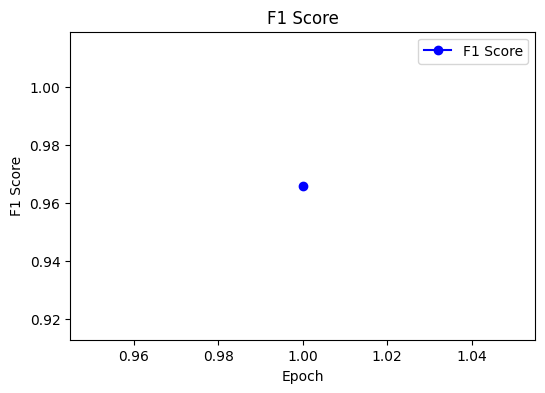

In [ ]:
# @title Compute F1-Score Visualization
from sklearn.metrics import f1_score

# Make predictions on the validation set
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the validation generator
true_labels = val_generator.classes

# Calculate F1 score
f1 = f1_score(true_labels, predicted_classes, average='weighted')

# Print the F1 score
print(f"F1 Score: {f1:.4f}")

# If you want to plot the F1 score (for a single epoch, it's just a single value)
# Plotting F1 score (for the sake of visualization, we plot it as a single point here)
plt.figure(figsize=(6, 4))
plt.plot([1], [f1], 'bo-', label='F1 Score')
plt.title('F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.show()


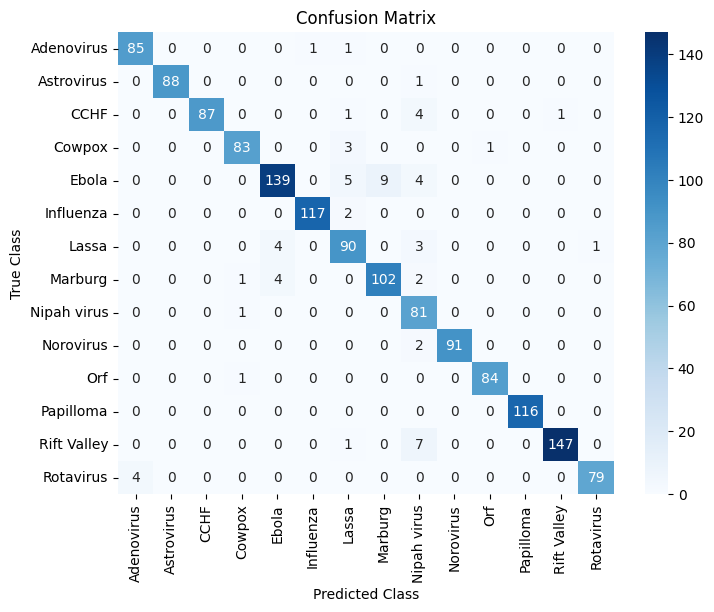

In [ ]:
# @title Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


AUC Scores per Class: [0.99984012 0.99733929 0.99943865 0.99973915 0.99687426 0.9999622
 0.99342571 0.99606815 0.99925282 0.99507432 0.9999914  1.
 0.99871266 0.99899745]


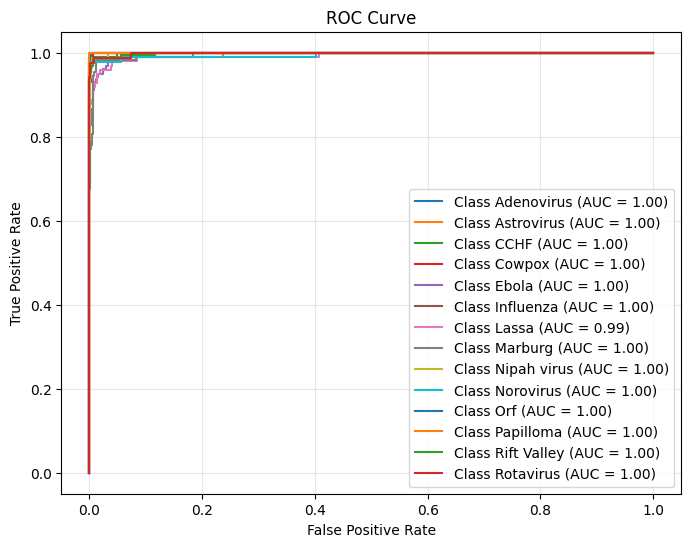

In [ ]:
# @title ROC and AUC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the true labels for multi-class ROC
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_labels)))  # Convert to binary format

# Compute AUC for each class
auc_scores = roc_auc_score(y_true_bin, y_pred_probs, average=None)
print("AUC Scores per Class:", auc_scores)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, label in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f"Class {label} (AUC = {auc_scores[i]:.2f})")

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.show()
